# Extract e Entendendo as funcionalidades do R

In [1]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.32   IRdisplay_1.1   utf8_1.2.3      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.6.2      htmltools_0.5.5 repr_1.1.6     
 [9] lifecycle

In [2]:
library()
# abrindo uma janela de pacotes instalados,
# onde não precisamos verdadeiramente utilizar uma instalação inicial, e sim apenas carregar.
# com o comando chamando o pacote.

In [3]:
# Carregar o pacote dplyr
library(dplyr)

# Consultar a documentação da função select
?select
# documentação prévia de uma funcionalidade de alguma biblioteca existente


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [23]:
dados <- read.csv("/content/dados.csv")

#  Transform

In [24]:
head(dados, 5)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631


In [25]:
head(unique(select(dados,Anos.de.Estudo)),5)
# Variáveis Categóricas, no caso qualitativa
# Podemos muito bem encadear as funções dentro do R
# unique () - agrupando valores distintos.
# select () - selecionando apenas uma coluna específica, então agrupando por anos de estudo.


,Anos.de.Estudo
,<int>
1,12
3,15
4,6
5,9
9,14


In [26]:
head(arrange(unique(select(dados,Anos.de.Estudo)),Anos.de.Estudo),5)
# reorganizar os dados em ordem crescente por padrão

,Anos.de.Estudo
,<int>
1,1
2,2
3,3
4,4
5,5


In [27]:
c(arrange(unique(select(dados,UF)),UF)) # verificando em lista, os códigos de UF existente

$UF
 [1] 11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50 51
[26] 52 53

In [28]:
sprintf('De %s até %s anos', min(dados$Idade), max(dados$Idade))
# consultando de maneira simplista: dados$Idade
# consultando de maneira tabular: select(dados, Idade)

[1] "De 13 até 99 anos"

In [29]:
library(glue)
glue('De {min(dados$Idade)} até {max(dados$Idade)} anos')


De 13 até 99 anos

# Verificando Distribuições de Frequências

In [30]:
table(dados$Sexo)
# macete para ver as quantidades


    0     1 
53250 23590 

In [31]:
dist_freq_qualitativas <- cbind(
  freq = table(dados$Sexo),
  percent = prop.table(table(dados$Sexo)) * 100
)

# cbind, transforma uma coluna em matriz
# contagens em relação a frequência de pessoas, quando masculino e feminino, dentro de nosso conjunto
# Percentual em relação a frequência geral

In [32]:
colnames(dist_freq_qualitativas) <- c('Frequência','Porcentagem (%)')
rownames(dist_freq_qualitativas) <- c('Masculino','Feminino')

In [33]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
Masculino,53250,69.29984
Feminino,23590,30.70016


# Parte 2 - Distribuições Qualitativas

In [44]:
frequencia <- table(dados$Sexo, dados$Cor)
# Na função table, o primeiro parâmetro
# corresponde às linhas e o segundo parâmetro às colunas da tabela de frequência que você deseja criar.
frequencia

   
        0     2     4     6     8
  0   256 22194  5502   235 25063
  1   101  9621  2889   117 10862

In [45]:
rownames(frequencia) <- c('Masculino', 'Feminino')
colnames(frequencia) <- c('Indígena', 'Branca','Preta','Amarela','Parda')

In [48]:
frequencia <- cbind(frequencia) # caso queira uma tabela mais bonita

In [50]:
frequencia_percentual <- prop.table(frequencia) * 100
# caso queira transformar tudo em percentual
# com relação ao total geral.
frequencia_percentual

,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,0.1314420,12.52082,3.759761,0.1522644,14.13587


# Part 3 - Distribuição de Frequência Quantitativa com Classes personalizadas

In [55]:
classes <- c(0,1576,3152,7880,15760,200000)
labels <- c('E','D','C','B','A')

In [57]:
cut(x=dados$Renda,
breaks = classes,
labels=labels,
include.lowest = TRUE) # padrão um parâmetro que vai desconsiderar o primeiro valor
# onde para cada linha de meu dataframe: dados$Renda ele está classificando

[1] E E E C E E D D D E D D E D D C E C D E D C E E E E D D D D D E E D E E
   [37] E E E E E E E E D E E E C E D D E C C E E E E E E E E E E E E E E E E D
   [73] D E D E E E E E E E E E E E E D E D E E E E E E E E E E E E E E D E E E
  [109] D C D E D E E E E E E D E A D D E E E E E E E E E E D E E D E D D E E D
  [145] D B E C D E E E C D D C D C E E E E D E E E C E C D C E D D C E E E E D
  [181] E D E E E E E D D D D E E E D E E B C E E D E E E E E E D B E C D E D E
  [217] E E E E E E E E B E C D E C E D C E D C E E E E D E D E D E E B E E D E
  [253] D E D E E E E D E E E E D E E E D E E E D E E E D D E E E E D E D C E E
  [289] D E E E E E E E E E E E E E E E D E E E E E E E E E D D E E E E E D E E
  [325] E E D E E E E E D E D D C C C E E E E E E E E E D E D E E E D E C E E E
  [361] D D D E E E E E E E E E E D E D E E E E E B E D E E D E E D D E D E D E
  [397] D C D B E D B E D D D C C E E C E B E E E E D C C C E E E E D E D E E E
  [433] C E E C C D E E E D E E E E E E D E C D E E E E C E E E E E E E E E E D
  [469] E E E E E E E D E E C E E E E E E E D E C D E E D E E E E D E E E E E E
  [505] D E E E E E A E E E E E E E D C D E E E C E E C E E E E E E D D D E D E
  [541] E E E D D E D D D C E C E E E E D E E D C E C E E D E E E E E E B E D D
  [577] E E E E E E D D C E D D E E E E E D C E E E E E E E E E E D E E E E E E
  [613] E C E E D E E E E E E E D E E D D E E E E D E E D E E D E D E E E E C E
  [649] D D E E E E E E E E E C D E E E D C D E D D D D E D C C E E B C C A E C
  [685] D E D E E E E E D D C E E E D D D C D E E D D E E D E D D E C E D C E D
  [721] E C E D E D D B E D D D C D C C E E E E D E D C C C D D E E E E C B D C
  [757] D D D E D E E D C C D E E D E D E E D E C C D C E E C D E B E E D E E E
  [793] E E D E E D E D E E E E E D D D E E D E E C C D D E E E D E D D E E D E
  [829] E E D E C E D E D E E E E E D C E E D D D C C D D E E D D D D E E E E E
  [865] E D D D E E D D E E E D D C E E E D E D D D E E E E E D D D C D E C C E
  [901] E E E E E E E E D D E C C D E E D E E E E D D D D E D D B C C C C D C B
  [937] D E D E E D E D E E E D E E E E E E E E D E D E C D C C E C D E E D D E
  [973] E C D E E E C E E C C C B E D E E C A E D E E E E E D E D E E E D D E E
 [1009] B E D E E E E E E E E E E E E D D E E E C E C D E E E E E E E D D E C E
 [1045] B E D E D E E E E B C E D E D E E E D E E E D D E E E E D E D C E D D E
 [1081] E E E C C D E D D D C D D E E E E E E E E E D E D D E E D E E E E E D E
 [1117] C C E E D C E E E D E E E E E E E E E B E E E E D C E E C D E D E E C E
 [1153] E E E E D C E E E D C E E E E E E E E E E D E E E E E E E E E D E E E D
 [1189] E E E E E E E D E E D E E E E E E E E D E D E E E E E E E D C E E C E E
 [1225] D E E D E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E C E
 [1261] E E E C D E E C D E E E E E E E E E E E E E E E E E E E E D E E D E E D
 [1297] E E E D E E E E E E D E E E E E E E E E E E E E E E E E E E E E E E E E
 [1333] E E E E D E B D D C E D C D E E E B E E E D E D E E D E E D E E E D E E
 [1369] E E E D D E E E E E E D D D C E E E E D E E E E E D E E E E E D E E E E
 [1405] D E E E E E E C D E C E E D E E E D E E E E E C C B E B D C E B E E E E
 [1441] E D E E E E D E E E E E E E E E E E E E E C E D D E D E E E E E E E E D
 [1477] E D E D E E E D C E E E E E D E E E E E E E E E E E E E E E E E E E E E
 [1513] E E E E E E E E E E D E E E E E E D C E D D D C E E E E E D C C E E E D
 [1549] E C E D E E E E E E E E E E E D E E E E E E E D D E E E E E B E E E E A
 [1585] E E E E E E D E D E E C A B D D E E E C D E E E E E E E E E C D E D E E
 [1621] E E E C E E E E E E D E D E E E E E E E E E E E E E E E E E E E E E E E
 [1657] E E E E E E E E E D C E D E E E E E E D E E E E E E E D D E E E E E E E
 [1693] E E E E E E E E E E E D E E E E E E E E E E E E E D D D E D E E C E E D
 [1729] E E C E E E E E E E E E E E E D E E E E E E E E E E E E E E E E E E C E
 [1765] E E E E E E C E E E E E E E E E E E E E E E D E E E E D E E D C E E D E
 [18

In [59]:
frequencia <- table(cut(x=dados$Renda,
breaks = classes,
labels=labels,
include.lowest = TRUE) )

frequencia # ou seja frequência de classes que definimos para cada Renda existente


    E     D     C     B     A 
49755 16700  7599  2178   608 

# Representando as tabelas de Distribuição de frequência com Histogramas em R

In [60]:
options(repr.plot.width = 7,repr.plot.height = 4)

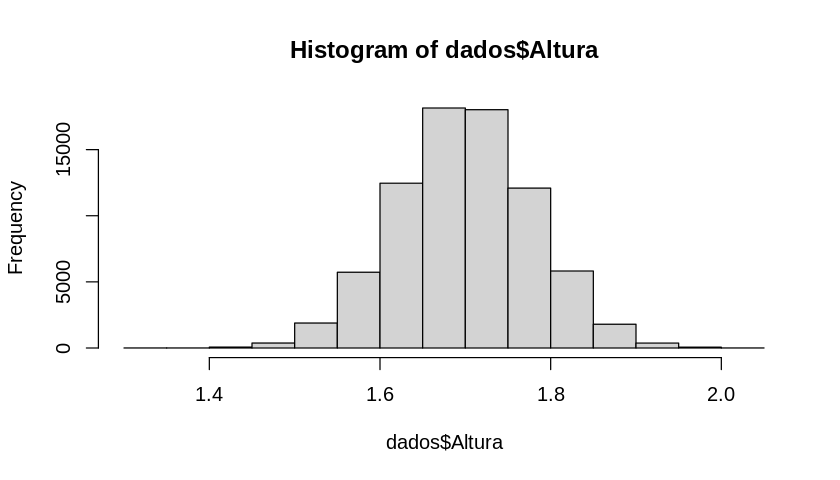

In [61]:
hist(dados$Altura) # plotando o histograma

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


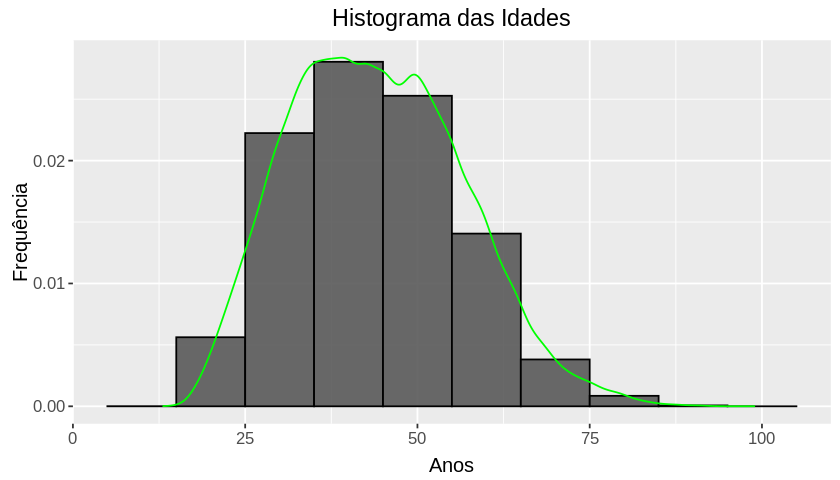

In [63]:
library(ggplot2)


ggplot(dados, aes(x = Idade, y = ..density..)) +
    geom_histogram(binwidth = 10, color = "black", alpha = 0.9) +
    geom_density(color = 'green') +
    ylab("Frequência") +
    xlab("Anos") +
    ggtitle('Histograma das Idades') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )



# Medidas de tendência central - análises descritivas

In [64]:
# Comportamento de nossos dados, quando usamos medidas centrais para descrever estes dados
# MUITO INFLUENCIADA PELOS EXTREMOS DE NOSSA DISTRIBUIÇÃO + outras informações conseguimos..
aggregate(list(Renda = dados$Renda),list(Sexo = dados$Sexo),mean)

Sexo,Renda
<int>,<dbl>
0,2192.442
1,1566.847


In [66]:
median(dados$Renda)

[1] 1200

In [70]:
# CRIANDO UMA FUNÇÃO QUE NOS DÁ A MODA DE RENDA DENTRO DE NOSSO CONJUNTO DE DADOS

Moda <- function(x) {
  freq <- table(x)
  return(names(freq)[freq == max(freq)])
}

Moda(dados$Renda)

[1] "788"

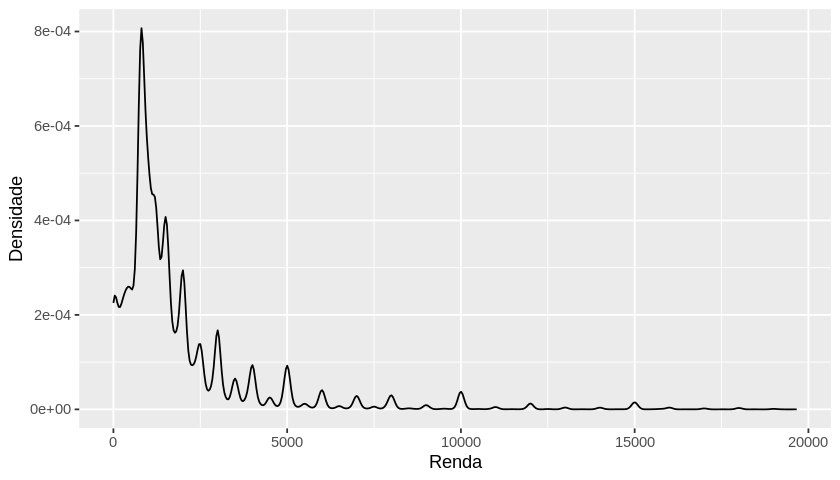

In [76]:
library(ggplot2)


dados_filtrados <- subset(dados, Renda < 20000)

ggplot(dados_filtrados, aes(x = Renda)) +
  geom_density() +
  xlab("Renda") +
  ylab("Densidade")


* Quartis, Decis e Percentis
* BOXPLOT

In [80]:
#  Estas medidas não são muito afetadas, pelos extremos.
quantile(dados$Renda,c(0.25,0.5,0.75))

decis <- c()
for(i in 1:9){
  decis <- c(decis, i/10)
}
decis

quantile(dados$Renda,decis)

25%  50%  75% 
 788 1200 2000

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

10%  20%  30%  40%  50%  60%  70%  80%  90% 
 350  788  800 1000 1200 1500 1900 2500 4000

In [82]:
percentis <- c()
for(i in 1:99){
  decis <- c(decis, i/100)
}
decis

quantile(dados$Renda,percentis)

[1] 0.10 0.20 0.30 0.40 0.50 0.60 0.70 0.80 0.90 0.10 0.20 0.30 0.40 0.50 0.60
 [16] 0.70 0.80 0.90 1.00 1.10 1.20 1.30 1.40 1.50 1.60 1.70 1.80 1.90 2.00 2.10
 [31] 2.20 2.30 2.40 2.50 2.60 2.70 2.80 2.90 3.00 3.10 3.20 3.30 3.40 3.50 3.60
 [46] 3.70 3.80 3.90 4.00 4.10 4.20 4.30 4.40 4.50 4.60 4.70 4.80 4.90 5.00 5.10
 [61] 5.20 5.30 5.40 5.50 5.60 5.70 5.80 5.90 6.00 6.10 6.20 6.30 6.40 6.50 6.60
 [76] 6.70 6.80 6.90 7.00 7.10 7.20 7.30 7.40 7.50 7.60 7.70 7.80 7.90 8.00 8.10
 [91] 8.20 8.30 8.40 8.50 8.60 8.70 8.80 8.90 9.00 9.10 9.20 9.30 9.40 9.50 9.60
[106] 9.70 9.80 9.90 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12
[121] 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27
[136] 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42
[151] 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57
[166] 0.58 0.59 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72
[181] 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87
[196] 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99

numeric(0)

In [84]:
length(dados$Idade[dados$Idade <= 40]) / length(dados$Idade) * 100

# porcentagem de pessoas com menos de 40 anos.

[1] 42.07574

Utilizando o que aprendemos em nosso último vídeo, mostre o percentual exato de pessoas que, em 2015, ganhavam no máximo meio salário mínimo (salário mínimo em 2015: R$ 788,00).
***

In [97]:
length(dados$Idade[dados$Renda <= (788/2)]) / length(dados$Renda) * 100
# NO MÁXIMO, ou seja está divisão ou menos que isso, se ligue na interpretação da pesquisa

[1] 10.62467

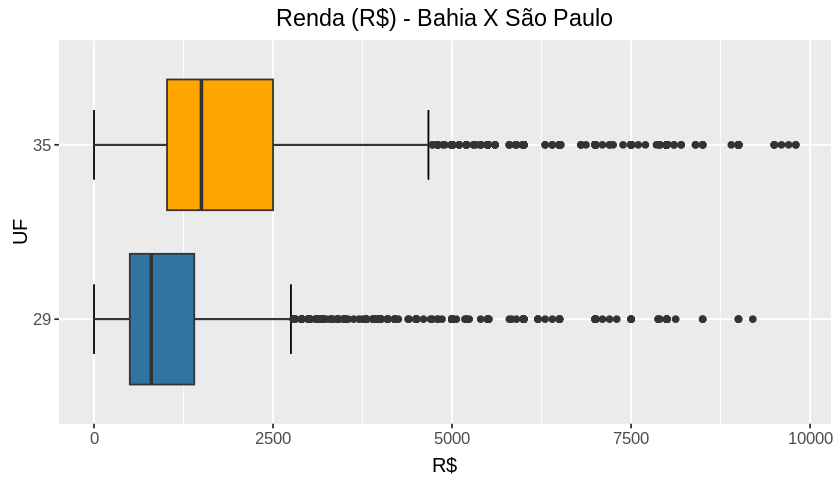

In [96]:
dados$Cat.UF <- factor(dados$UF)

ggplot(
    data = dados[(dados$UF == 29 | dados$UF == 35) & dados$Renda < 10000, ],
    aes(y = Renda, x = Cat.UF)
) +
    stat_boxplot(geom ='errorbar', width = 0.4) +
    geom_boxplot(fill = c('#3274A1', "orange")) +
    coord_flip() +
    ylab("R$") +
    xlab("UF") +
    ggtitle('Renda (R$) - Bahia X São Paulo') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

É possível notar que os chefes de domicílio em São Paulo têm uma renda maior que os da Bahia, também notamos uma maior dispersão nos dados de São Paulo

# Desvio Médio Absoluto, Medidas de Dispersão: Variânça

In [102]:
# Instalando o pacote DescTools
packageurl <- "https://cran.r-project.org/src/contrib/Archive/DescTools/DescTools_0.99.30.tar.gz"
# dentro do R documentation online, eu peguei este link da Azure, onde eu posso usar o Desctools
install.packages(packageurl,repos=NULL,type='source')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(packageurl, repos = NULL, type = "source"):
“installation of package ‘/tmp/RtmptTU6JF/downloaded_packages/DescTools_0.99.30.tar.gz’ had non-zero exit status”


In [ ]:
library(DescTools)
MeanAD(dados$Renda) # Desvio Padrão absoluto da variável Renda

In [103]:
varianca <- var(dados$Renda)
varianca

[1] 11044906

In [106]:
# Desvio Padrão Normal
desvio_padrao <- sd(dados$Renda)
desvio_padrao

[1] 3323.388

In [108]:
summary(dados)

       UF             Sexo           Idade            Cor       
 Min.   :11.00   Min.   :0.000   Min.   :13.00   Min.   :0.000  
 1st Qu.:25.00   1st Qu.:0.000   1st Qu.:34.00   1st Qu.:2.000  
 Median :31.00   Median :0.000   Median :43.00   Median :4.000  
 Mean   :31.91   Mean   :0.307   Mean   :44.07   Mean   :5.033  
 3rd Qu.:41.00   3rd Qu.:1.000   3rd Qu.:53.00   3rd Qu.:8.000  
 Max.   :53.00   Max.   :1.000   Max.   :99.00   Max.   :8.000  
                                                                
 Anos.de.Estudo      Renda            Altura          Cat.UF     
 Min.   : 1.00   Min.   :     0   Min.   :1.339   35     : 8544  
 1st Qu.: 6.00   1st Qu.:   788   1st Qu.:1.646   31     : 7686  
 Median :11.00   Median :  1200   Median :1.699   43     : 6322  
 Mean   : 9.47   Mean   :  2000   Mean   :1.700   29     : 5717  
 3rd Qu.:12.00   3rd Qu.:  2000   3rd Qu.:1.753   33     : 5556  
 Max.   :17.00   Max.   :200000   Max.   :2.028   15     : 4449  
                  

In [ ]:
# Estas medidas de dispersão podem nos mostrar que estes dados não são tão iguais assim.